In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
#Fungsi Waktu
def time(X,Y,Xs,Ys,Vp,t0):
    dist = (X-Xs)**2+(Y-Ys)**2
    ti = t0 + (np.sqrt(abs(dist))/Vp)
    return ti

In [3]:
#Data
Xs = np.array([50,80,60,60])
Ys = np.array([40,50,40,30])
dobs = np.array([8.0,5.1,5.4,4.9])
V = 4 #km/s
t0 = 0

In [4]:
#Model Awal
iterasi = 1
mat_iterasi = []
Erms = 1
mat_Erms = []
X_model_awal = 20
Y_model_awal = 20

In [5]:
#Melakukan inversi non-linier
while Erms >=0.05:
    if iterasi == 1:
        X_model = X_model_awal
        Y_model = Y_model_awal
    elif iterasi == 100:
        break
    else :
        X_model = X_Koreksi
        Y_model = Y_Koreksi
    mat_iterasi.append(iterasi)
    dcal = np.zeros(len(dobs))
    for i in range(len(dcal)):
        dcal[i] = time(X_model,Y_model,Xs[i],Ys[i],V,t0)
    misfit = dobs-dcal
    Erms = np.sqrt(1/(len(dobs))*sum((misfit)**2))
    #Membuat matriks jacobi
    J = np.zeros((len(dcal),2))
    for i in range(len(dcal)):
        J[i,0] = (X_model-Xs[i]/(np.sqrt((Xs[i]-X_model)**2+(Ys[i]-Y_model)**2)))
        J[i,1] = (Y_model-Ys[i]/(np.sqrt((Xs[i]-X_model)**2+(Ys[i]-Y_model)**2)))
    #Hitung Delta M
    deltaM = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(J),J)),np.transpose(J)),misfit)
    #Hitung X dan Z model baru
    X_Koreksi = X_model+deltaM[0]
    Y_Koreksi = Y_model+deltaM[1]
    iterasi+=1
    mat_Erms.append(Erms)
    print('-' * 50)
    print("X model =",X_model)
    print("Y model = ",Y_model)
    print("Erms = ",Erms)
    print("Iterasi = ",iterasi)
    #Live Plot
    


--------------------------------------------------
X model = 20
Y model =  20
Erms =  7.069034412316953
Iterasi =  2
--------------------------------------------------
X model = 26.11807679344609
Y model =  13.720918473992386
Erms =  6.583681100625164
Iterasi =  3
--------------------------------------------------
X model = 31.855411001533746
Y model =  2.2305295356202954
Erms =  7.283113557713678
Iterasi =  4
--------------------------------------------------
X model = 32.928210396724936
Y model =  -25.67366347187478
Erms =  12.650132991024812
Iterasi =  5
--------------------------------------------------
X model = 82.69363413968884
Y model =  35.64816606265933
Erms =  0.894261967586825
Iterasi =  6
--------------------------------------------------
X model = 83.82328442817848
Y model =  32.97994972622535
Erms =  0.8396442195037763
Iterasi =  7
--------------------------------------------------
X model = 84.69476457867674
Y model =  30.70480235791704
Erms =  1.0047856833022581
Iteras

In [6]:
#PENJELASAN
#Model awal yang digunakan adalah model kedua (x0,y0) = (20,20).
#Model awal kedua menghasilkan nilai yang konvergen pada X=80 Y=30 Erms = 0.1 dengan iterasi sebanyak 1000 kali
#Model awal Pertama (x0,y0) = (30,90) menghasilkan nilai Erms akhir yang lebih besar daripada model kedua
#Hal ini mungkin dikarenakan Model awal pertama terjebak pada minimum lokal sehingga tidak bisa menemukan solusi global



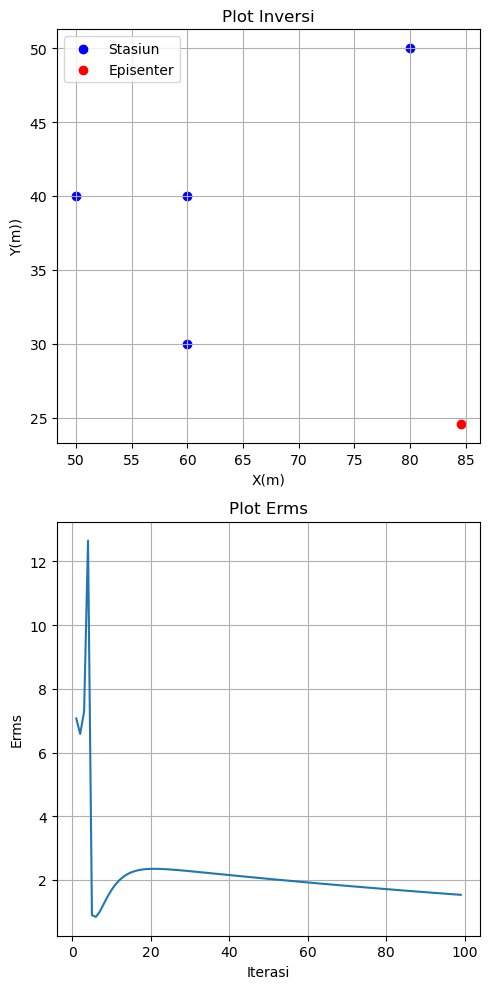

In [9]:
fig,ax = plt.subplots(2,1,figsize=(5,10))
ax[0].clear()
ax[0].scatter(Xs,Ys,color='b',label='Stasiun')
ax[0].scatter(X_model,Y_model,color='r',label='Episenter')
ax[0].set_xlabel("X(m)")
ax[0].set_ylabel("Y(m))")
ax[0].set_title("Plot Inversi")
ax[0].legend()
ax[0].grid()
ax[1].plot(mat_iterasi,mat_Erms)
ax[1].set_title("Plot Erms")
ax[1].set_xlabel("Iterasi")
ax[1].set_ylabel("Erms")
plt.tight_layout()
plt.grid()    
plt.show()
# plt.pause(1000) #Uncomment ini jika grafik langsung tertutup
